# Getting Started with Network Analysis in Python
Created by Eric Sims

So, how do we actually make a social network to analyze? We're going to look at three different ways to import files that can be used to create a network.

But first, let's talk about components of a network: Nodes and Edges. If you think of a social network like people who know one another, then the people would be the nodes, and the connections between them would be the edges.

_[Insert image here]_

But how do we make a network in the first place?? It would be impractical to make it ourselves, so we just need to get the data into a useful format.

Today we'll talk about 3 different ways to create a network in Python:
* Edgelist
* Adjacency Matrix
* JSON

## Creating Networks

### Edgelists

An edgelist is a list of "Sources" and "Targets" that represent each connection in the network. Here's a super simple edgelist for some characters in Lord of the Rings:

In [1]:
import pandas as pd
import networkx as nx
from networkx.readwrite import json_graph
import json
import matplotlib.pyplot as plt

In [2]:
df_edgelist = pd.read_csv('lotr_network_edgelist.csv')
df_edgelist

,Source,Target
0,Bilbo,Gandalf
1,Bilbo,Frodo
2,Frodo,Gandalf
3,Frodo,Bilbo
4,Frodo,Merry
5,Merry,Frodo
6,Merry,Gandalf
7,Merry,Treebeard
8,Treebeard,Merry
9,Gandalf,Frodo


Now we can draw this as a network. First, we create the graph object. In NetworkX, graphs are usually called G, so you'll see that a lot in the docs and in StackOverflow. I like more descriptive graph names, but we'll stick with G here to keep things consistent.

We'll create the graph using the "from_pandas_edgelist" function and tell it the source and target columns, which I already named so they'd be easy to find. You could name them anything, though, like "employee" and "co-worker" or "super hero" and "arch-nemesis". They can be used to describe whatever relationships you would like to analyze.

In [3]:
G = nx.from_pandas_edgelist(df_edgelist,source="Source", target="Target")

Next, we'll use the `nx.draw()` function to take a first look at our network. We pass the graph we would like to draw, a position argument `pos` to specify the layout, and whether we'd like to see labels on the nodes..

_Note: There are a lot of different `pos` options you can explore. We're just going to use the circular layout for this one._

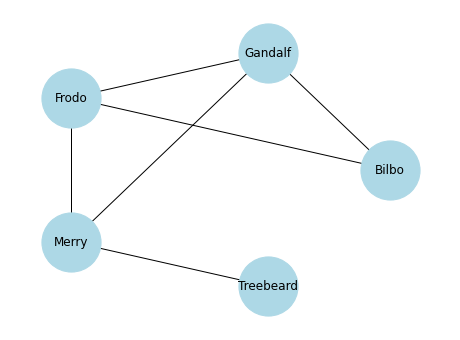

In [4]:
fig = plt.subplots(figsize=(8,6))
plt.margins(.2,.2)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color='lightblue', node_size=3500)

In [5]:
from pyvis.network import Network

# create pyvis Network object
net = Network(height = "600px", width = "600px", notebook = True)

G = nx.from_pandas_edgelist(df_edgelist,source="Source", target="Target")

net.from_nx(G)
net.show_buttons()
net.show('out1.html')


### Adjacency Matrix

Another way to make a graph is with a pandas adjacency matrix. An adjacency matrix has the node names across the top and left side and has a number at the intersection of nodes that interact in some way. Here's the adjacency matrix for our LotR network:

In [6]:
# Read in data
df_adj_matrix = pd.read_csv('lotr_network_adjacency_matrix.csv')

# Rename first column
df_adj_matrix.rename(columns={'Unnamed: 0':'Nodes'}, inplace=True)

# Set nodes as index
df_adj_matrix.set_index('Nodes', inplace=True)

# Let's have a look...
df_adj_matrix

,Bilbo,Frodo,Gandalf,Merry,Treebeard
Nodes,,,,,
Bilbo,0,1,1,0,0
Frodo,1,0,1,1,0
Gandalf,1,1,0,1,0
Merry,0,1,1,0,1
Treebeard,0,0,0,1,0


A couple of things to notice here:
* The 1's correspond to characters that interacted in the movies
* The diagonal of the matrix is all zeros because we already know that the characters are in the same scenes as themselves. In this particular network, this doesn't add any value.
* Lastly, this matrix is symmetrical along the diagonal. That's because all the edges are "undirected", which means it doesn't matter if Frodo talked to Gandalf or the other way around. We'll see more of that in a moment.

If we draw the adjacency matrix, we'll see it looks pretty much the same as the graph from the pandas edgelist. That's good! It just means you can get the same result when data comes in different formats.

In [13]:
G = nx.from_pandas_adjacency(df_adj_matrix)

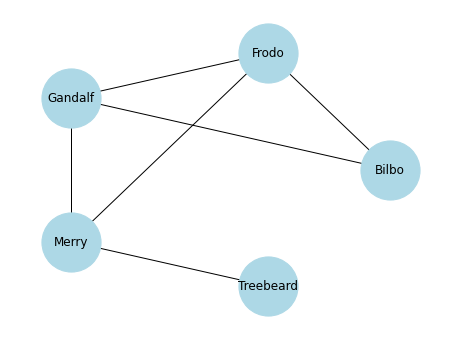

In [14]:
fig = plt.subplots(figsize=(8,6))
plt.margins(.2,.2)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color='lightblue', node_size=3500)

### JSON

The last way I'll show you how to make a network is from JSON. JSON is a non-tabular format, so it looks a lot different from others we've seen so far. A JSON graph has tow sections: Nodes and Links. The first, which you can see below, is the list of nodes, and the second is a list of each of the edges. We can use the JSON library in Python and NetworkX to create a graph from a JSON file, and then we'll draw the graph like we have previously.

This first function opens the file with the JSON library in Python and then returns a graph.

In [15]:
# JSON file to graph
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

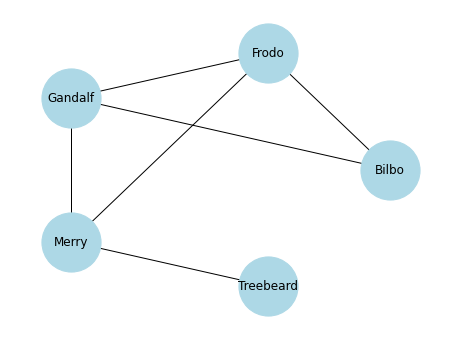

In [16]:
fig = plt.subplots(figsize=(8,6))
plt.margins(.2,.2)
G = read_json_file('lotr_network_json.json')
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color='lightblue', node_size=3500)

So that's how you get started making a graph! One of the challenges is getting the data into the right format so your sources and targets are all lined up. Twitter and Reddit are great places to get network data for projects and wrangling practice.

## What you can learn from a network

One thing I love about networks is how we can see and track motion. We can see direction in a network using a "directed" graph.

Previously, we only saw undirected graphs, which is when you just have a line connecting two nodes. But what if you wanted to show the flow of something, like money? What if Bilbo gave Frodo some money, but Frodo didn't give any back? Then we could represent it with an arrow! When we show the directed flow of material, information, or any other transitive relationship, we call it a directed graph.

Here's an updated edgelist showing who gave money to whom in our Lord of the Rings group.

[show updated edgelist]

And here it is in an adjacency matrix. You can seeta our matrix isn't symmetrical anymore, and that's because one intersection of two nodes represents one direction of the relationship, and the other intersection represents the other direction.

[show adjacency matrix]

When we create this as a directed graph, we add a small piece to our NetworkX function:

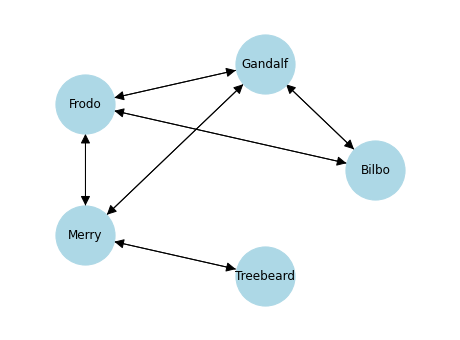

In [32]:
fig = plt.subplots(figsize=(8,6))
plt.margins(.2,.2)
G = nx.from_pandas_edgelist(df_edgelist,source="Source", target="Target",create_using=nx.DiGraph())
# nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color='lightblue', node_size=3500)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color='lightblue', node_size=3500, arrowsize=20)